In [1]:

import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s4e8/sample_submission.csv
/kaggle/input/playground-series-s4e8/train.csv
/kaggle/input/playground-series-s4e8/test.csv


### IMPORTING LIBRARIES

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
import pickle
from sklearn.metrics import confusion_matrix, matthews_corrcoef

### DATASET LOADING

In [3]:
df=pd.read_csv("/kaggle/input/playground-series-s4e8/train.csv")
df.head(10)

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
5,5,p,4.30,x,t,n,f,s,c,n,...,NaN,NaN,w,NaN,n,t,z,NaN,d,a
6,6,e,9.65,p,y,w,f,e,c,k,...,NaN,s,w,NaN,NaN,t,e,NaN,g,w
7,7,p,4.55,x,e,e,f,a,NaN,y,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
8,8,p,7.36,f,h,e,f,x,d,w,...,b,NaN,w,NaN,NaN,f,f,NaN,d,a
9,9,e,6.45,x,t,n,f,a,d,w,...,NaN,NaN,e,NaN,NaN,f,f,NaN,d,a


In [4]:
df.dtypes

id                        int64
class                    object
cap-diameter            float64
cap-shape                object
cap-surface              object
cap-color                object
does-bruise-or-bleed     object
gill-attachment          object
gill-spacing             object
gill-color               object
stem-height             float64
stem-width              float64
stem-root                object
stem-surface             object
stem-color               object
veil-type                object
veil-color               object
has-ring                 object
ring-type                object
spore-print-color        object
habitat                  object
season                   object
dtype: object

In [5]:
df.describe(include="all")

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
count,3.116945e+06,3116945,3.116941e+06,3116905,2445922,3116933,3116937,2593009,1858510,3116888,...,359922,1136084,3116907,159452,375998,3116921,2988065,267263,3116900,3116945
unique,NaN,2,NaN,74,83,78,26,78,48,63,...,38,60,59,22,24,23,40,32,52,4
top,NaN,p,NaN,x,t,n,f,a,c,w,...,b,s,w,u,w,f,f,k,d,a
freq,NaN,1705396,NaN,1436026,460777,1359542,2569743,646034,1331054,931538,...,165801,327610,1196637,159373,279070,2368820,2477170,107310,2177573,1543321
mean,1.558472e+06,NaN,6.309848e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,8.997847e+05,NaN,4.657931e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,NaN,3.000000e-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.792360e+05,NaN,3.320000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.558472e+06,NaN,5.750000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.337708e+06,NaN,8.240000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.drop_duplicates()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,3116940,e,9.29,f,NaN,n,t,NaN,NaN,w,...,b,NaN,w,u,w,t,g,NaN,d,u
3116941,3116941,e,10.88,s,NaN,w,t,d,c,p,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
3116942,3116942,p,7.82,x,e,e,f,a,NaN,w,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
3116943,3116943,e,9.45,p,i,n,t,e,NaN,p,...,NaN,y,w,NaN,NaN,t,p,NaN,d,u


In [7]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    3116945 non-null  int64  
 1   class                 3116945 non-null  object 
 2   cap-diameter          3116941 non-null  float64
 3   cap-shape             3116905 non-null  object 
 4   cap-surface           2445922 non-null  object 
 5   cap-color             3116933 non-null  object 
 6   does-bruise-or-bleed  3116937 non-null  object 
 7   gill-attachment       2593009 non-null  object 
 8   gill-spacing          1858510 non-null  object 
 9   gill-color            3116888 non-null  object 
 10  stem-height           3116945 non-null  float64
 11  stem-width            3116945 non-null  float64
 12  stem-root             359922 non-null   object 
 13  stem-surface          1136084 non-null  object 
 14  stem-color            3116907 non-

### DATA PREPROCESSING

In [8]:
#dividing the training data to features and target 
x=df.drop(columns=['class','id']) # feature
y=df['class'] # target
del df

In [9]:
x.isna().sum() #checking null values

cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

In [10]:
for columns in x:
    print(columns ,': ' ,x[columns].unique())

cap-diameter :  [ 8.8   4.51  6.94 ... 38.11 55.63 54.07]
cap-shape :  ['f' 'x' 'p' 'b' 'o' 'c' 's' 'd' 'e' 'n' nan 'w' 'k' 'l' '19.29' '5 f' 't'
 'g' 'z' 'a' '2.85' '7 x' 'r' 'u' '3.55' 'is s' 'y' '4.22' '3.6' '21.56'
 'i' '6 x' '24.16' '8' 'm' 'ring-type' '10.13' 'is p' '7.43' 'h' '0.82'
 '10.46' '2.77' '2.94' '12.62' '5.15' '19.04' '4.97' '49.21' 'b f' '9.13'
 '1.66' '3.37' '7.21' '3.25' '11.12' '3 x' '4.3' '7.41' '6.21' '8.29'
 '54.78' '20.25' '3.52' '3.04' '2.63' '3.91' '6.44' '8.3' '7.6' '17.44'
 '4.33' '2.82' '6.53' '19.06']
cap-surface :  ['s' 'h' 'y' 'l' 't' 'e' 'g' nan 'd' 'i' 'w' 'k' '15.94' 'f' 'n' 'r' 'o'
 'a' 'u' 'z' '2.7' 'does l' '5.07' 'p' 'b' 'm' 'cap-diameter' '1.43' 'x'
 '7.14' 'c' 'is h' 'does t' '0.85' '6.57' '12.79' '6.45' '4.66' '23.18'
 '3.06' '16.39' '4.21' 'veil-color' '11.78' '8.1' 'has-ring' 'does h'
 '1.42' 'class' 'has h' 'does None' '10.83' 'season' '8.96' '14.04' '5.73'
 'is None' '24.38' '2.81' '0.88' '2.11' '2.79' 'ring-type'
 'does-bruise-or-bleed' '

In [11]:
#Calculating percentage of Null value 
total_examples=len(x)
temp_df=pd.DataFrame(x.isnull().sum(),columns=['NULL'])
temp_df['%NULL']=(temp_df['NULL']*100)/total_examples
temp_df

,NULL,%NULL
cap-diameter,4,0.000128
cap-shape,40,0.001283
cap-surface,671023,21.528227
cap-color,12,0.000385
does-bruise-or-bleed,8,0.000257
gill-attachment,523936,16.809280
gill-spacing,1258435,40.373988
gill-color,57,0.001829
stem-height,0,0.000000
stem-width,0,0.000000


In [12]:
del temp_df #no longer in use 

In [13]:
#dropping column which contain more than 87% Null values

x=x.drop(['stem-root','veil-type','veil-color','spore-print-color'],axis=1)

In [14]:
#differentiate Numerical and categorical data

cat_features=x.select_dtypes(include=['object'])
num_features=x.select_dtypes(exclude=['object'])
del x

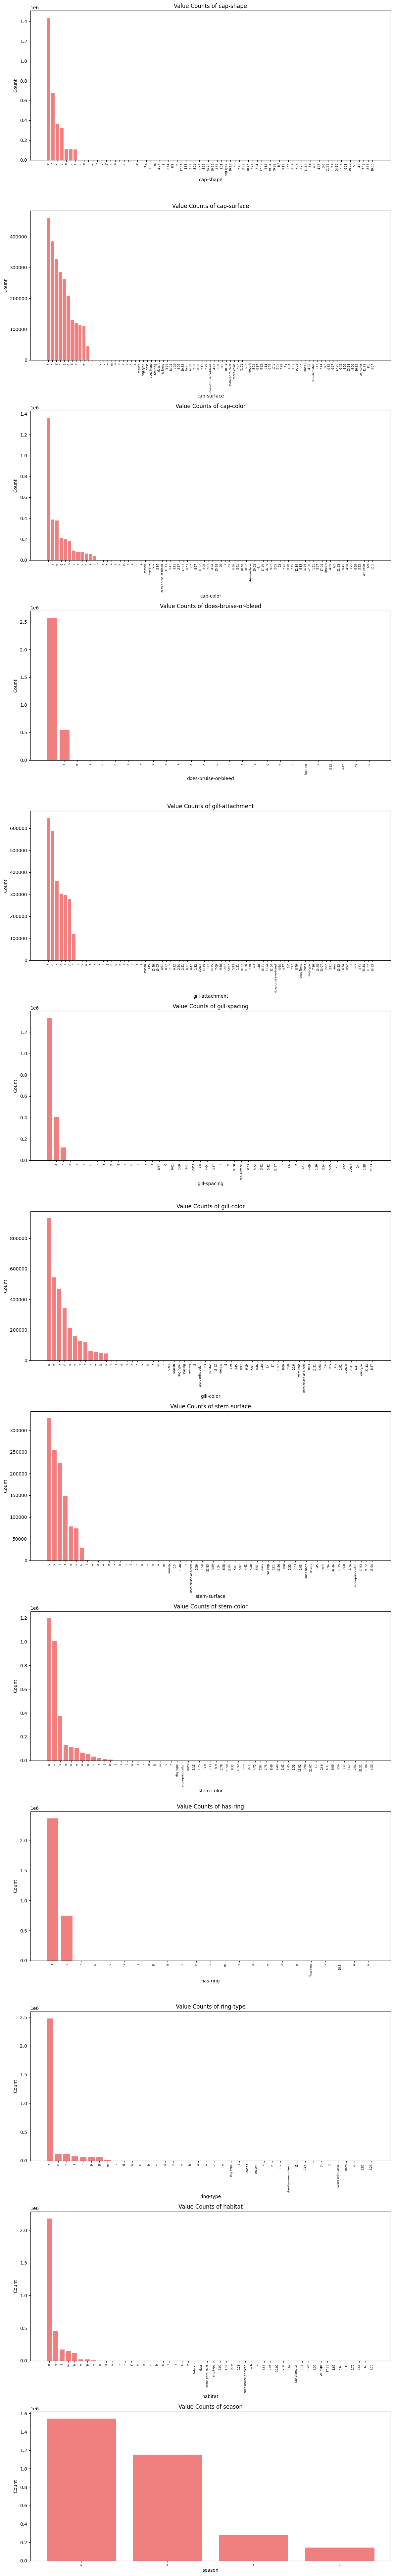

In [18]:
import matplotlib.pyplot as plt

num_cols = len(cat_features.columns)
fig, axes = plt.subplots(nrows=num_cols, figsize=(12, 6 * num_cols))

# Ensure axes is always iterable
if num_cols == 1:
    axes = [axes]  

for i, col in enumerate(cat_features.columns):
    counts = cat_features[col].value_counts()
    axes[i].bar(counts.index.astype(str), counts.values, color='lightcoral')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Value Counts of {col}')
    axes[i].tick_params(axis='x', rotation=90, labelsize=6)

plt.tight_layout()
plt.show()


In [19]:
#Combining categories with low frequency (<70) together as 'other' feature

def low_freq_catogories(df, threshold=70):
    for column in df:
        counts = df[column].value_counts()
        others = counts[counts <= threshold].index
        df[column] = df[column].apply(lambda x: "other" if x in others else x)
    return df


cat_features=low_freq_catogories(cat_features)        

In [20]:
#final categorical entry count for each feature
for col in cat_features:
    letters = cat_features[col].nunique()
    print(f"'{col}' : {letters} unique categories.")

'cap-shape' : 8 unique categories.
'cap-surface' : 14 unique categories.
'cap-color' : 13 unique categories.
'does-bruise-or-bleed' : 3 unique categories.
'gill-attachment' : 9 unique categories.
'gill-spacing' : 4 unique categories.
'gill-color' : 13 unique categories.
'stem-surface' : 9 unique categories.
'stem-color' : 14 unique categories.
'has-ring' : 3 unique categories.
'ring-type' : 10 unique categories.
'habitat' : 9 unique categories.
'season' : 4 unique categories.


In [21]:
for columns in cat_features:
    print(columns ,': ' ,cat_features[columns].unique())

cap-shape :  ['f' 'x' 'p' 'b' 'o' 'c' 's' 'other' nan]
cap-surface :  ['s' 'h' 'y' 'l' 't' 'e' 'g' nan 'd' 'i' 'w' 'k' 'other' 'f' 'n']
cap-color :  ['u' 'o' 'b' 'g' 'w' 'n' 'e' 'y' 'r' 'p' 'k' 'l' 'other' nan]
does-bruise-or-bleed :  ['f' 't' 'other' nan]
gill-attachment :  ['a' 'x' 's' 'd' 'e' nan 'f' 'p' 'other' 'c']
gill-spacing :  ['c' nan 'd' 'f' 'other']
gill-color :  ['w' 'n' 'g' 'k' 'y' 'f' 'p' 'o' 'b' 'u' 'e' 'r' 'other' nan]
stem-surface :  [nan 'y' 's' 't' 'g' 'h' 'k' 'i' 'f' 'other']
stem-color :  ['w' 'o' 'n' 'y' 'e' 'u' 'p' 'f' 'g' 'r' 'k' 'l' 'b' 'other' nan]
has-ring :  ['f' 't' 'other' nan]
ring-type :  ['f' 'z' 'e' nan 'p' 'l' 'g' 'r' 'm' 'other' 't']
habitat :  ['d' 'l' 'g' 'h' 'p' 'm' 'u' 'w' 'other' nan]
season :  ['a' 'w' 'u' 's']


#### FILLING MISSING VALUES

In [22]:
def cleaning_data(df,strategy='mean'):
    try:
        for col in df:
            imputer=SimpleImputer(strategy=strategy)
            df[col]=imputer.fit_transform(df[col].values.reshape(-1,1))
    except:
        imputer=SimpleImputer(strategy=strategy)
        df.imputer.fit_transform(df.values.reshape(-1,1))
    return df
num_features=cleaning_data(num_features,'median')

In [23]:
num_features.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 3 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   cap-diameter  3116945 non-null  float64
 1   stem-height   3116945 non-null  float64
 2   stem-width    3116945 non-null  float64
dtypes: float64(3)
memory usage: 71.3 MB


In [24]:
# One hot encoding

cat_features=pd.get_dummies(cat_features,columns=(cat_features.columns),dummy_na=True,dtype='float64')

In [25]:
cat_features.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Columns: 126 entries, cap-shape_b to season_nan
dtypes: float64(126)
memory usage: 2.9 GB


In [26]:
y #target feature of the training set

0          e
1          p
2          e
3          e
4          e
          ..
3116940    e
3116941    e
3116942    p
3116943    e
3116944    p
Name: class, Length: 3116945, dtype: object

In [27]:
y=y.map({'p':float(1),'e':float(0)}) #encoding

In [28]:
y

0          0.0
1          1.0
2          0.0
3          0.0
4          0.0
          ... 
3116940    0.0
3116941    0.0
3116942    1.0
3116943    0.0
3116944    1.0
Name: class, Length: 3116945, dtype: float64

In [29]:
y=pd.DataFrame(y,columns=['class'])

In [30]:
y=cleaning_data(y,'mean') #imputing missing target value for training

In [31]:
y.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 1 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   class   3116945 non-null  float64
dtypes: float64(1)
memory usage: 23.8 MB


In [32]:
#concatinating numerical and categorical features
train=pd.concat([num_features,cat_features],axis=1)
del num_features
del cat_features

In [33]:
train.head()

,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_other,cap-shape_p,cap-shape_s,...,habitat_other,habitat_p,habitat_u,habitat_w,habitat_nan,season_a,season_s,season_u,season_w,season_nan
0,8.80,4.51,15.39,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,4.51,4.79,6.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,6.94,6.85,9.93,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3.88,4.16,6.53,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5.85,3.37,8.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### BUILDING MODEL

In [34]:
#Spilting train and validation set

RANDOM_STATE=55
x_train,x_val,y_train,y_val=train_test_split(train,y,train_size=0.8,random_state=RANDOM_STATE)
del train
del y

In [35]:
#Parameters of xg boost classifier

param={'n_estimators': 297, 'max_depth': 16, 'learning_rate': 0.0390615938640, 'subsample': 0.693590001048, 
           'colsample_bytree': 0.517116070496, 'gamma': 0.000137107789661244, 'lambda': 0.00172032715816567, 
           'alpha': 8.501510750413265e-06, 'scale_pos_weight': 1.0017942891559255,'enable_categorical': True,
           'tree_method': 'hist', 'device': 'cuda'}

In [36]:
#model
xgb_model = XGBClassifier(**param)

In [37]:
#Training model
xgb_model.fit(x_train,y_train)

XGBClassifier(alpha=8.501510750413265e-06, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.517116070496, device='cuda',
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, feature_types=None, gamma=0.000137107789661244,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=0.00172032715816567,
              learning_rate=0.039061593864, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=297, n_jobs=None, ...)

#### PREDICTION

In [38]:
#prediction for validation set
xgb_val = xgb_model.predict(x_val)

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [04:27:51] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


In [42]:
#SAVING MODEL
with open("xgboost_model.pkl", "wb") as f:
    pickle.dump(xgb_model, f)

In [40]:
# Confusion matrix for accuracy
confusion_matrix(xgb_val,y_val)

array([[280534,   2700],
       [  2055, 338100]])

In [41]:
#Accuracy of model
matthews_corrcoef(xgb_val,y_val)

0.9846156328073694